In [ ]:
# Name : Riska Tri Mardilah
# username : chikayyz
# email : rchika532@gmail.com
# No Hp : +6282285366786
# Alamat : Jl. Veteran Gang Pemuda No.97B, Kabupaten Lahat, Sumatera Selatan

In [ ]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip\
  -O /tmp/rockpaperscissors.zip

--2021-05-29 08:17:04--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  1.79MB/s    in 3m 33s  

2021-05-29 08:20:38 (1.44 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [ ]:
import zipfile,os
local_zip = '/tmp/rockpaperscissors.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/rockpaperscissors/rps-cv-images'

In [ ]:
os.listdir('/tmp/rockpaperscissors/rps-cv-images')

['scissors', 'paper', 'rock', 'README_rpc-cv-images.txt']

In [ ]:
train_rock_dir = os.path.join(train_dir, 'rock')
train_paper_dir = os.path.join(train_dir, 'paper')
train_scissors_dir = os.path.join(train_dir, 'scissors')

validation_rock_dir = os.path.join(validation_dir, 'rock')
validation_paper_dir = os.path.join(validation_dir, 'paper')

In [ ]:
from sklearn.model_selection import train_test_split

train_rock_dir = train_test_split(os.listdir('/tmp/rockpaperscissors/hasil_split/train/rock'), test_size = 0.40)
validation_rock_dir = train_test_split(os.listdir('/tmp/rockpaperscissors/hasil_split/val/rock'), test_size = 0.40)
train_paper_dir = train_test_split(os.listdir('/tmp/rockpaperscissors/hasil_split/train/paper'), test_size = 0.40)
validation_paper_dir = train_test_split(os.listdir('/tmp/rockpaperscissors/hasil_split/val/paper'), test_size = 0.40)
train_scissors_dir = train_test_split(os.listdir('/tmp/rockpaperscissors/hasil_split/train/scissors'), test_size = 0.40)
validation_scissors_dir = train_test_split(os.listdir('/tmp/rockpaperscissors/hasil_split/val/scissors'), test_size = 0.40)

In [ ]:
datagen = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=20,
                    horizontal_flip=True,
                    shear_range = 0.2,
                    validation_split=0.4,
                    fill_mode = 'nearest')

In [ ]:
train_generator = datagen.flow_from_directory(
        base_dir,
        subset="training",
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')
 
validation_generator = datagen.flow_from_directory(
        base_dir,
        subset="validation",
        target_size=(150, 150),
        batch_size=4,
        class_mode='categorical')

Found 1314 images belonging to 3 classes.
Found 874 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [ ]:
model.compile(loss='categorical_crossentropy',
              optimizer=tf.optimizers.Adam(),
              metrics=['accuracy'])
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_28 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_28 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_29 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_29 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_30 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 15, 15, 128)      

In [ ]:
model.fit(
      train_generator,
      steps_per_epoch=45,
      epochs=100,
      validation_data=validation_generator,
      validation_steps=3,
      verbose=2)

Epoch 1/100
45/45 - 12s - loss: 1.1231 - accuracy: 0.3333 - val_loss: 1.3167 - val_accuracy: 0.1667
Epoch 2/100
45/45 - 11s - loss: 1.0134 - accuracy: 0.4556 - val_loss: 0.7163 - val_accuracy: 0.5000
Epoch 3/100
45/45 - 11s - loss: 0.7827 - accuracy: 0.7000 - val_loss: 0.6995 - val_accuracy: 0.8333
Epoch 4/100
45/45 - 11s - loss: 0.5309 - accuracy: 0.7944 - val_loss: 0.5078 - val_accuracy: 0.7500
Epoch 5/100
45/45 - 11s - loss: 0.4610 - accuracy: 0.8222 - val_loss: 0.0837 - val_accuracy: 1.0000
Epoch 6/100
45/45 - 12s - loss: 0.4596 - accuracy: 0.8167 - val_loss: 0.7010 - val_accuracy: 0.9167
Epoch 7/100
45/45 - 11s - loss: 0.4206 - accuracy: 0.8611 - val_loss: 0.2044 - val_accuracy: 1.0000
Epoch 8/100
45/45 - 11s - loss: 0.3016 - accuracy: 0.9111 - val_loss: 0.3498 - val_accuracy: 0.9167
Epoch 9/100
45/45 - 11s - loss: 0.2370 - accuracy: 0.9157 - val_loss: 0.7489 - val_accuracy: 0.8333
Epoch 10/100
45/45 - 11s - loss: 0.2995 - accuracy: 0.8722 - val_loss: 0.0507 - val_accuracy: 1.0000

Saving WhatsApp Image 2021-05-29 at 15.11.50 (1).jpeg to WhatsApp Image 2021-05-29 at 15.11.50 (1) (1).jpeg
WhatsApp Image 2021-05-29 at 15.11.50 (1).jpeg
scissors


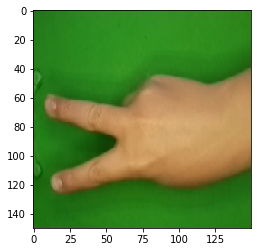

In [ ]:
import numpy as np
from google.colab import files
from keras.preprocessing import image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
 
uploaded = files.upload()
 
for fn in uploaded.keys():
 
  # predicting images
  path = fn
  img = image.load_img(path, target_size = (150,150))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis = 0)
 
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  
  print(fn)
  if classes[0][0] == 1:
    print('paper')
  elif classes[0][1] == 1:
    print('rock')
  elif classes[0][2] == 1:
    print('scissors')
  else:
    print('invalid image')